In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pyro
import pyro.distributions as dist

When the prior variance changes.

Text(0, 0.5, 'percentage')

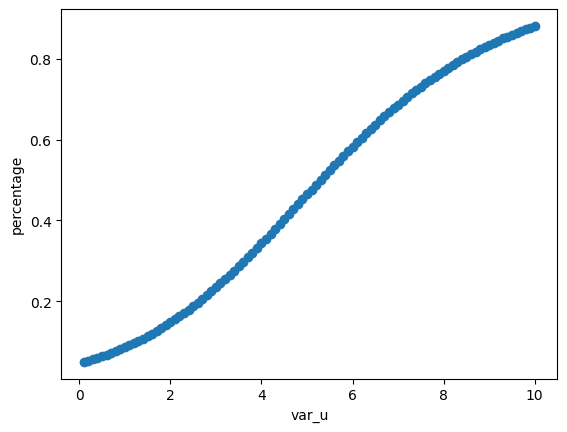

In [8]:
# time delay a list of 100 range 1-150
# prior variance a list of 100 range 0.1-10
# prior mean 0
# LL reward (also the estimation mean) 20
# estimation variance (uncertainty) 5
# ss value 3

var_u = np.linspace(0.1, 10, 100)
mean_u = torch.tensor(0.)
var_es = torch.tensor(3.)
mean_es = torch.tensor(20.)
ss = 3
percentage_list = []
estimate_list = []

delay = 10
for i in var_u:
    e = (mean_u*delay*var_es + mean_es*i)/(delay*var_es + i)
    estimate_list.append(e)
    p = torch.nn.functional.softmax(torch.tensor([e, ss]), dim = 0)[0]
    percentage_list.append(p)

plt.scatter(var_u, percentage_list)
plt.xlabel("var_u")
plt.ylabel("percentage")

Text(0, 0.5, 'estimations')

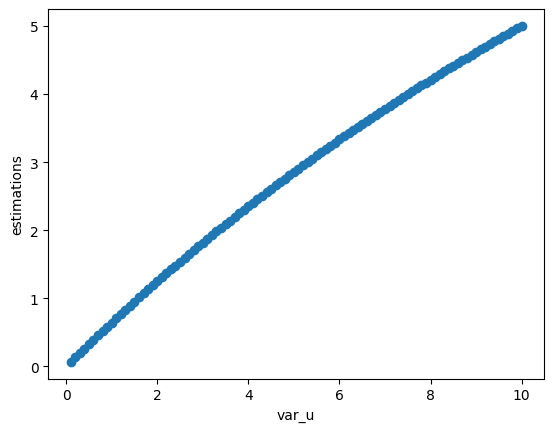

In [9]:
plt.scatter(var_u, estimate_list)
plt.xlabel("var_u")
plt.ylabel("estimations")

In [2]:
2**2*3**2

36

When the delay changes.

Text(0, 0.5, 'percentage')

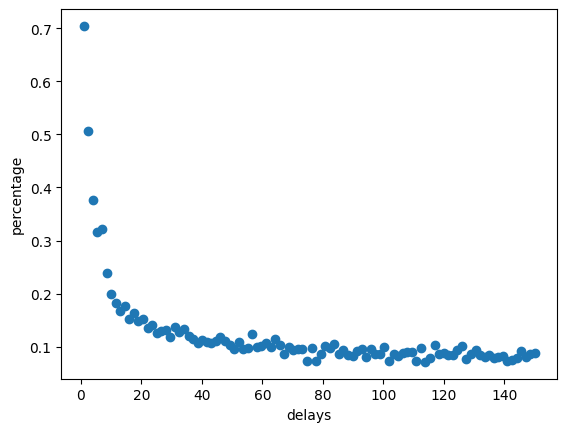

In [17]:
from scipy.stats import norm
from scipy.integrate import quad

# Define the function to compute the area of overlap
def overlap_area(x):
    return min(norm.pdf(x, loc=e_ll_mean, scale=e_ll_sigma),
               norm.pdf(x, loc=e_ss_mean, scale=e_ss_sigma))

# time delay a list of 100 range 1-150
# prior variance a list of 100 range 0.1-10
# prior mean 0
# LL reward (also the estimation mean) 20
# estimation variance (uncertainty) 5
# ss value 3

delays = np.linspace(1, 150, 100)
sigma_u = torch.tensor(2.)
mean_u = torch.tensor(0.)
sigma_es = torch.tensor(.5)
mean_es = torch.tensor(5.)
sigma_ss = torch.tensor(1.)
ss = 3
percentage_list = []
estimate_list = []

for i in delays:

    e_ll_mean = (mean_u*i*sigma_es + mean_es*sigma_u)/(i*sigma_es + sigma_u)
    e_ll_sigma = ((sigma_u**2*sigma_es**2)/(sigma_u**2 + sigma_es**2))**0.5
    e_ss_mean = ss
    e_ss_sigma = sigma_ss





# plt.scatter(delays, percentage_list)
# plt.xlabel("delays")
# plt.ylabel("percentage")
# # plt.savefig('images/two_distr_delay_percent.png')


In [ ]:
dist

In [22]:


# Compute the area of overlap using numerical integration
p, _ = quad(overlap_area, -np.inf, np.inf)

print("Area of overlap:", p)

Area of overlap: 0.049569156774785184


The two normal distributions sampling

In [ ]:
repitition = 100

for i in delays:
    temp = []
    for j in range(repitition):
        e_ll_mean = (mean_u*i*sigma_es + mean_es*sigma_u)/(i*sigma_es + sigma_u)
        e_ll_sigma = ((sigma_u**2*sigma_es**2)/(sigma_u**2 + sigma_es**2))**0.5
        e_ss_mean = ss
        e_ss_sigma = sigma_ss

        ll_dist = dist.Normal(e_ll_mean, e_ll_sigma)
        ss_dist = dist.Normal(e_ss_mean, e_ss_sigma)

        ll_sample = ll_dist.sample()
        ss_sample = ss_dist.sample()

        p = torch.nn.functional.softmax(torch.tensor([ll_sample, ss_sample]), dim = 0)[0]
        temp.append(p)
    percentage_list.append(sum(temp)/len(temp))

plt.scatter(delays, percentage_list)
plt.xlabel("delays")
plt.ylabel("percentage")
# plt.savefig('images/two_distr_delay_percent.png')

In [16]:
mean([1,2,3,4])

TypeError: 'int' object is not callable

In [10]:
test = dist.Normal(mean_u, sigma_u)

In [11]:
test.sample()

tensor(1.6733)

ValueError: x and y must be the same size

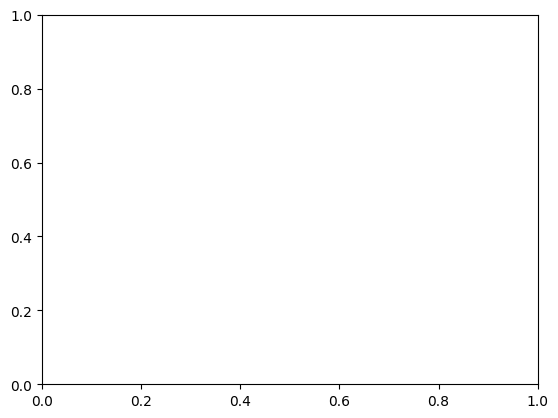

In [14]:
plt.scatter(delays, estimate_list)
plt.xlabel("delays")
plt.ylabel("estimations")
plt.savefig('images/two_distri_delay_esti_5.png')